In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False

import warnings  
warnings.filterwarnings('ignore')


In [19]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv", parse_dates=['datetime'])

print(train.shape)
train.head(20)
test = pd.read_csv("~/data/data/bike-sharing-demand/test.csv", parse_dates=['datetime'])


(10886, 12)


In [28]:
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")



train['year'] = train['datetime'].dt.year            # 년
train['month'] = train['datetime'].dt.month          # 월
train['day'] = train['datetime'].dt.day              # 일
train['hour'] = train['datetime'].dt.hour            # 시
train['minute'] = train['datetime'].dt.minute        # 분
train['second'] = train['datetime'].dt.second        # 초
train['dayofweek'] = train['datetime'].dt.dayofweek  # 요일

print(train.shape)
train.head(3)





(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5


In [27]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test.head(3)






(6493, 13)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

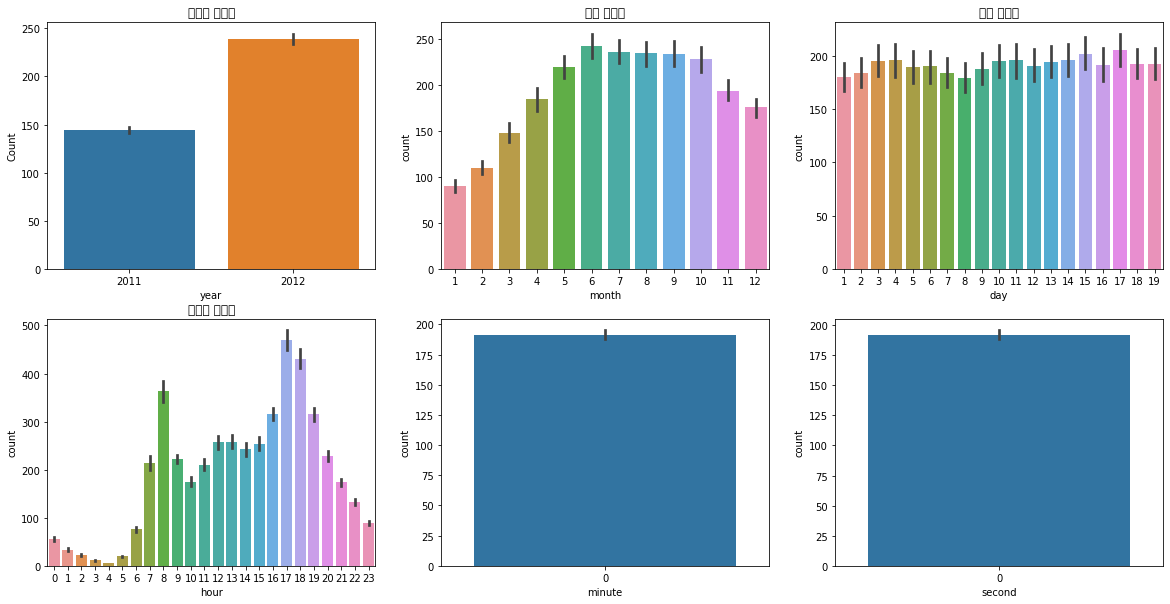

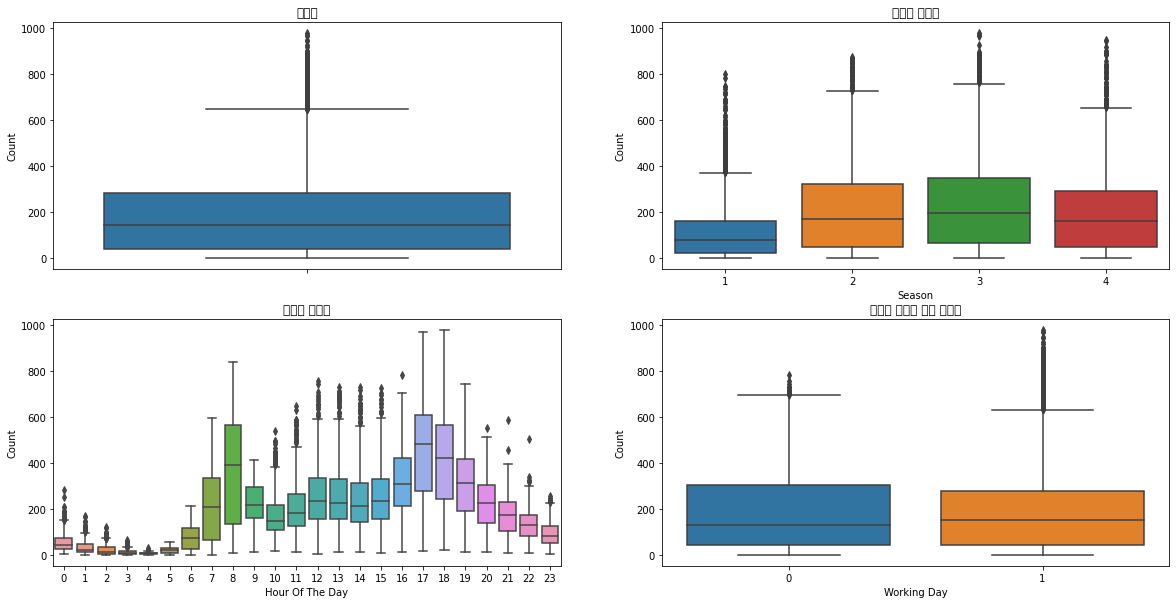

In [26]:

from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')
#한글 꺠짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3) 
figure.set_size_inches(20,10)





sns.barplot(data=train, x='year', y='count', ax=ax1)   # 년
sns.barplot(data=train, x='month', y='count', ax=ax2)  # 월
sns.barplot(data=train, x='day', y='count', ax=ax3)    # 일
sns.barplot(data=train, x='hour', y='count', ax=ax4)   # 시
sns.barplot(data=train, x='minute', y='count', ax=ax5) # 분
sns.barplot(data=train, x='second', y='count', ax=ax6) # 초

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")


figure, axis = plt.subplots(nrows=2, ncols=2)          # 테이블 위치 (2, 2) 지정
figure.set_size_inches(20, 10)
sns.boxplot(data=train, y='count', ax=axis[0][0])                     # 대여량 전체
sns.boxplot(data=train, y='count', x='season', ax=axis[0][1])         
sns.boxplot(data=train, y='count', x='hour', ax=axis[1][0])
sns.boxplot(data=train, y='count', x='workingday', ax=axis[1][1])

# 라벨 달기
axis[0][0].set(ylabel='Count',title="대여량")
axis[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axis[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axis[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")


In [34]:
feature_names = ["season", "weather", "temp", "atemp", "humidity",
                 "year", "hour", "dayofweek", "holiday", "workingday"
                ]
X_train = train[feature_names]
X_test = test[feature_names]
label_name = "count"

y_train = train[label_name]


from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

from IPython.display import Image
Image(url="https://www.researchgate.net/profile/Hieu_Tran33/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm")


from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train) # log1p => 1을 더해 0값이 나오지 않게 함

# y_train값이 아닌 log함수를 한 y_train_log의 값으로 한다.
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)



RMSLE Value For Random Forest:  0.10656511436759517


In [ ]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse


In [ ]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
rmse = RMSE(predictions, y)
rmse

In [ ]:
회고
1. 기초가 튼튼하지 않으면 사소한 것에서 막히게 된다.
2. 손실함수를 구하는 과정을 제대로 이해하지 못 하면, RMSE값을 제대로 구할 수 없다.
3. 검색이 매우 유용했다. 하지만 검색의 결과에서 이해할 수 없는 것들도 많았다.
4. 다시 한 번 이를 검토해서 모두 이해하는 과정이 필요할 것 같다.
5. 그래프를 구현하는데 생각보다 수월했다.